<table style="background-color: transparent;">
    <tr style="background-color: transparent;">
        <td width="400px"><font size="15px" color="#f25625">Tercera<br>Escuela<br>de Verano</font></td>
        <td>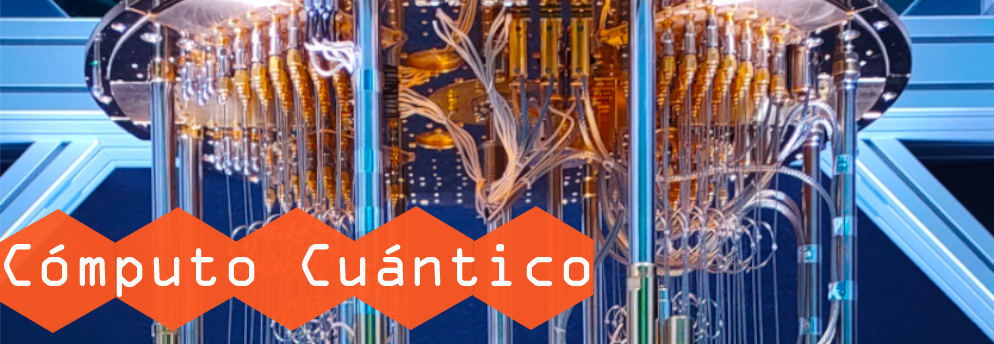</td>
    </tr>
</table>

<p style="text-align:right; font-weight:bold;">Autora: Claudia Zendejas-Morales</p>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

# <center> Sistemas Multi-Qubits

## Contenido

1. [Sistemas con más de un Qubit](#1)
   1. [Estados multi-qubit](#1.1)
   2. [Compuertas de un qubit en estados multi-qubit](#1.2)
   3. [Compuertas de dos qubits](#1.3)
      1. [Compuerta $CNOT$ o $CX$](#1.3.1)
      2. [Compuertas controladas](#1.3.2)
      3. [Compuerta $SWAP$](#1.3.3)
   4. [Compuertas de más qubits](#1.4)
      1. [Compuerta Toffoli , $CCNOT$ o $CCX$](#1.4.1)
      2. [Compuerta Fredkin o $CSWAP$](#1.4.2)
      3. [Compuerta controlada personaliza](#1.4.3)
2. [Estados de Bell: Entrelazamiento](#2)
3. [QSphere, otra forma de visualizar estados multi-qubit](#3)
4. [Simular Circuitos Cuánticos](#4)
      1. [Primitivas de Qiskit Runtime](#4.1)
          1. [Primitiva Sampler](#4.1.1)
          2. [Primitiva Estimator](#4.1.2)
5. [Errores y cómo corregirlos](#5)
   1. [Mitigación de errores](#5.1)
   2. [Corrección de errores](#5.2)
   3. [Diferencias](#5.3)
6. [Referencias](#6)

<a id="1"></a>
## 1. Sistemas con más de un Qubit

Hemos visto algunos efectos interesantes con qubits individuales y compuertas de un qubit, pero el verdadero poder de la computación cuántica se realiza a través de las interacciones entre qubits. En este notebook, presentaremos compuertas de múltiples qubits y exploraremos comportamientos interesantes de los sistemas multi-qubit.

Por lo general, las compuertas que se pueden implementar directamente en el hardware actuarán solo en uno o dos qubits. En nuestros circuitos, podemos querer usar compuertas complejas que actúen sobre una gran cantidad de qubits. Afortunadamente, esto no será un problema. Con las compuertas de uno y dos qubits que nos proporciona el hardware, es posible construir cualquier otra compuerta.

<a id="1.1"></a>
## 1.1. Estados multi-qubit

La dimensión del espacio de Hilbert para $n$ qubits está dado por $2^n$. Para obtenerlo se usa el **producto tensorial** (o *[producto de Kronecker](https://en.wikipedia.org/wiki/Kronecker_product)*).

### Recordatorio: Producto tensorial

El producto tensorial, denotado por $\otimes$, se puede aplicar a vectores y matrices (en general a [tensores](https://en.wikipedia.org/wiki/Tensor)). Actúa como sigue,

$$\vec{a}\otimes\vec{b}=\mymatrix{r}{ a_1 \\ a_2 }\otimes\mymatrix{r}{ b_1 \\ b_2 }=\mymatrix{r}{ a_1\mymatrix{r}{ b_1 \\ b_2 } \\ a_2\mymatrix{r}{ b_1 \\ b_2 } }=\mymatrix{r}{ a_1b_1 \\ a_1b_2 \\ a_2b_1 \\ a_2b_2 }$$

$$C\otimes D=\mymatrix{r}{ c_{11} & c_{12} \\ c_{21} & c_{22} }\otimes\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} }=\mymatrix{r}{ c_{11}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } & c_{12}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } \\ c_{21}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } & c_{22}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } }=\mymatrix{r}{ c_{11}d_{11} & c_{11}d_{12} & c_{12}d_{11} & c_{12}d_{12} \\ c_{11}d_{21} & c_{11}d_{22} & c_{12}d_{21} & c_{12}d_{22} \\ c_{21}d_{11} & c_{21}d_{12} & c_{22}d_{11} & c_{22}d_{12} \\ c_{21}d_{21} & c_{21}d_{22} & c_{22}d_{21} & c_{22}d_{22}}$$

### El espacio de 2 qubits

El espacio de Hilbert de un estado cuántico formado por dos qubits, $n=2$, tendrá una dimensión de $2^2=4$. Por ejemplo, el estado formado por dos qubits, cada uno en $\ket{0}$ es,

$$\ket{0}\otimes\ket{0}=\ket{00}=\mymatrix{r}{ 1 \\ 0 }\otimes\mymatrix{r}{ 1 \\ 0 }=\mymatrix{r}{ 1\mymatrix{r}{ 1 \\ 0 } \\ 0\mymatrix{r}{ 1 \\ 0 } }=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 0 }$$

Ahora, considerando todas las posibles combinaciones de los estados base para cada uno de los dos qubits, tenemos que,

$$\ket{0}\otimes\ket{0}=\ket{00}=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 0 }$$

$$\ket{0}\otimes\ket{1}=\ket{01}=\mymatrix{r}{ 0 \\ 1 \\ 0 \\ 0 }$$

$$\ket{1}\otimes\ket{0}=\ket{10}=\mymatrix{r}{ 0 \\ 0 \\ 1 \\ 0 }$$

$$\ket{1}\otimes\ket{1}=\ket{11}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 1 }$$

Notemos que debido a que estamos usando la *base computacional* para los qubits, podemos tener una relación directa con la representación de los números decimales en binario; es decir, el estado $\ket{00}$ tiene un $1$ en la posición $0$ del vector de estado de cuatro elementos, el estado $\ket{10}$ tienen un $1$ en la posición $2$ (contando desde cero), pues se cumple que $10_{binario} = 2_{decimal}$.


### El espacio de 3 qubits

Para el caso de $n=3$, tenemos que la dimensión es $2^3=8$, entonces los vectores de estado para este espacio de Hilbert, en la base computacional, serían:

$$\ket{000}=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{001}=\mymatrix{r}{ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{010}=\mymatrix{r}{ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{011}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 }$$

$$\ket{100}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{101}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 }, ~~~~ \ket{110}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 }, ~~~~ \ket{111}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 }$$

<a id="1.2"></a>
## 1.2. Compuertas de un qubit en estados multi-qubit

Las compuertas de un solo qubit que actúan en estados multi-qubit, deben tener la dimension correcta para poder efectuar la multiplicación matriz por vector.

Si por ejemplo tenemos esto: $H\ket{q_1q_0}$, no se puede saber a cual de los dos qubits se le debe aplicar la compuerta $H$ si a $\ket{q_1}$ o a $\ket{q_0}$, entonces se debe ser explícito. Si lo que se desea es aplicar $H$ al $\ket{q_0}$ se debe escribir:

$$I\otimes H \; \ket{q_1q_0}$$

Lo que implica que se aplicará la compuerta *identidad* al $\ket{q_1}$, es decir, no será afectado.

La compuerta $I\otimes H$ a aplicar al estado de 2 qubits es:

$$I\otimes H=\mymatrix{r}{ 1 & 0 \\ 0 & 1 }\otimes\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}}=\mymatrix{r}{ 1\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} & 0\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} \\ 0\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} & 1\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} }=\mymatrix{rrrr}{ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 \\ 0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ 0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} }$$

En Qiskit podemos usar la clase `Operator` para obtener el operador equivalente a las compuertas agregadas a un circuito, veamos le ejemplo anterior:

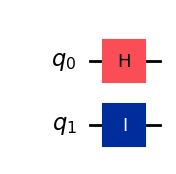

<IPython.core.display.Latex object>

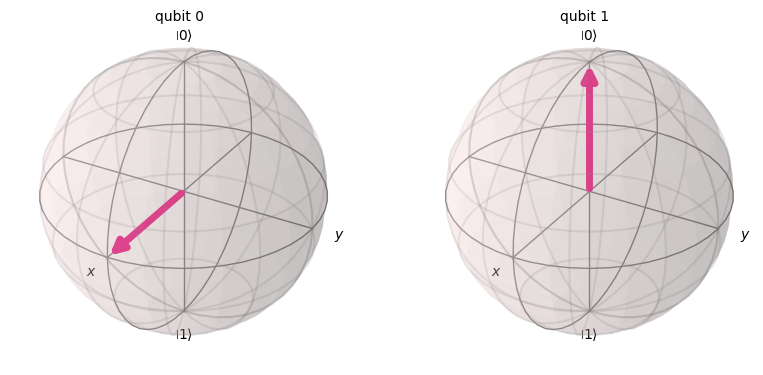

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Operator

circuit = QuantumCircuit(2) # circuito con 2 qubits

circuit.h(0)    # Hadamard en q0
circuit.id(1)   # Identidad en q1

display(circuit.draw('mpl'))

op = Operator(circuit)
display(array_to_latex(op))

psi = Statevector(circuit)

display(plot_bloch_multivector(psi))

Ejemplo con $3$ qubits $\ket{q_2 \, q_1 \, q_0}$:

$$H\otimes R_y(3\pi/5) \otimes R_x(\pi/4) \; \ket{000}$$

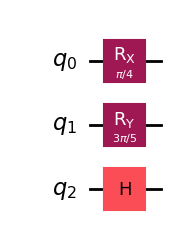

<IPython.core.display.Latex object>

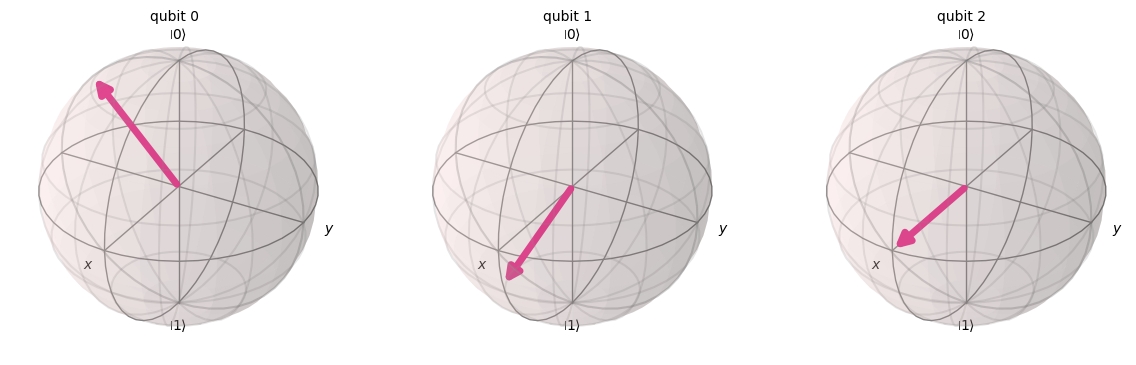

In [2]:
import numpy as np

circuit = QuantumCircuit(3) # circuito con 3 qubits

circuit.rx(np.pi/4, 0)      # Rx de pi/4  al q0
circuit.ry(3*np.pi/5, 1)    # Ry de 3pi/5 al q1
circuit.h(2)                # Hadamard al q2

display(circuit.draw('mpl'))

op = Operator(circuit)
display(array_to_latex(op))

psi = Statevector(circuit)

print()
display(plot_bloch_multivector(psi))

**Nota**: Si se aplica la misma compuerta a todos los qubits de un estado, se puede indicar con un subíndice, como por ejemplo, la compuerta $H_2=H\otimes H$ es aplicada a dos qubits: $H_2 \, \ket{00}=H\otimes H \, \ket{0}\otimes\ket{0}$ y de la misma manera, se tiene que,

$$H_n \, \underbrace{\ket{0...0}}_{n~qubits}=\underbrace{H\otimes\cdots\otimes H}_{n~Hadamards} \, \underbrace{\ket{0...0}}_{n~qubits}$$

Notaciones usadas:

$$\underbrace{H\otimes\cdots\otimes H}_{n~veces}=\bigotimes_1^n H=H^{\otimes n}=H_n$$

<a id="1.3"></a>
## 1.3. Compuertas de dos qubits

Ahora que ya sabemos cómo son los estados multi-qubit, podemos revisar las compuertas que son aplicadas a más de un qubit. Primero veamos algunas compuertas que necesitan dos qubits para operar.

<a id="1.3.1"></a>
### 1.3.1. Compuerta $CNOT$ o $CX$

Se trata de una compuerta controlada, actúa sobre dos qubits, en donde uno de ellos sirve como control y el otro como el objetivo. Se aplicará una operación $NOT$ o $X$ en el qubit objetivo, solo cuando el qubit control sea $\ket{1}$ y si no lo es, entonces el qubit objetivo permance sin cambio, por lo que, si el qubit de la izquierda ($\ket{q_1}$) es el control y el de la derecha ($\ket{q_0}$) es el objetivo, en el estado $\ket{q_1q_0}$, las transiciones son:

$$CNOT_{1,0}\ket{00}=\ket{00}$$
$$CNOT_{1,0}\ket{01}=\ket{01}$$
$$CNOT_{1,0}\ket{10}=\ket{11}$$
$$CNOT_{1,0}\ket{11}=\ket{10}$$

donde los subíndices en $CNOT$ indican el qubit control y el objetivo, en ese orden.

Dado esto podríamos tener otra versión del $CNOT$ en donde el qubit control sea $q_0$ y el objetivo sea $q_1$, las transiciones para este caso serían,

$$CNOT_{0,1}\ket{00}=\ket{00}$$
$$CNOT_{0,1}\ket{01}=\ket{11}$$
$$CNOT_{0,1}\ket{10}=\ket{10}$$
$$CNOT_{0,1}\ket{11}=\ket{01}$$

El order predeterminado en la mayoría de las referencias es que el qubit de la izquierda es el control, mientras que el de la derecha es el objetivo.

Conociendo la definición de la compuerta y las transiciones, podemos obtener la matriz que representa a la operación $CNOT$:

<table width='50%'>

<tr>
<td style='width:50%; text-align: center'><strong>Transiciones</strong></td>
<td style='width:50%; text-align: center'><strong>Matriz</strong></td>
</tr>

<tr>
<td style='width:50%; text-align: center'>
Compuerta $CNOT_{1,0}$:

$$\ket{00}\rightarrow\ket{00}$$
$$\ket{01}\rightarrow\ket{01}$$
$$\ket{10}\rightarrow\ket{11}$$
$$\ket{11}\rightarrow\ket{10}$$
</td>
<td style='width:50%; text-align: center'>
$
\begin{array}{c|cc} \hookleftarrow & \ket{00} & \ket{01} & \ket{10} & \ket{11} \\ \hline 
    \ket{00} & 1 & 0 & 0 & 0 \\ 
    \ket{01} & 0 & 1 & 0 & 0 \\ 
    \ket{10} & 0 & 0 & 0 & 1 \\ 
    \ket{11} & 0 & 0 & 1 & 0 \end{array}
$
</td>
</tr>

<tr>
<td style='width:50%; text-align: center'>
Compuerta $CNOT_{0,1}$:

$$\ket{00}\rightarrow\ket{00}$$
$$\ket{01}\rightarrow\ket{11}$$
$$\ket{10}\rightarrow\ket{10}$$
$$\ket{11}\rightarrow\ket{01}$$
</td>
<td style='width:50%; text-align: center'>
$
\begin{array}{c|cc} \hookleftarrow & \ket{00} & \ket{01} & \ket{10} & \ket{11} \\ \hline 
    \ket{00} & 1 & 0 & 0 & 0 \\ 
    \ket{01} & 0 & 0 & 0 & 1 \\ 
    \ket{10} & 0 & 0 & 1 & 0 \\ 
    \ket{11} & 0 & 1 & 0 & 0 \end{array}
$
</td>
</tr>

</table>

En Qiskit se cuenta con el método `cx(c, t)`, que recibe el qubit de control como primer parámetro y el qubit objetivo como segundo parámetro.

Este es el caso para CNOT(0,1)|01> = |11>


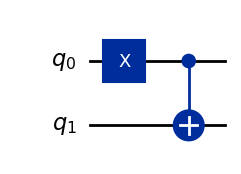

<IPython.core.display.Latex object>

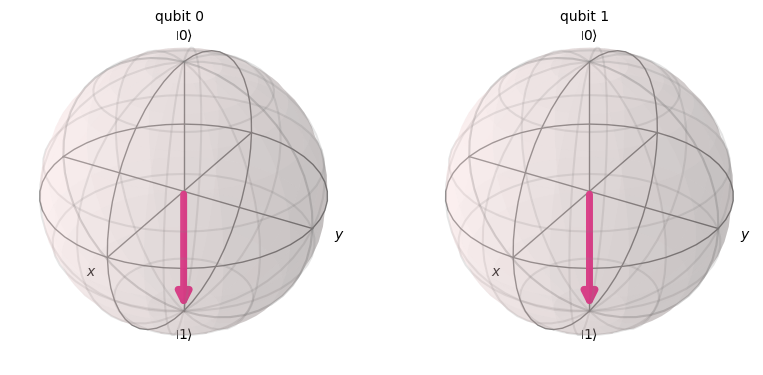

In [3]:
circ7 = QuantumCircuit(2)   # circuito con 2 qubits

circ7.x(0)                  # ponemos el control en |1> para que la compuerta sea aplicada

circ7.cx(0, 1)              # CNOT con q0 como control y q1 como objetivo

print("Este es el caso para CNOT(0,1)|01> = |11>")

display(circ7.draw('mpl'))

op = Operator(circ7)
display(array_to_latex(op))

psi = Statevector(circ7)

print()
display(plot_bloch_multivector(psi))

Este es el caso para CNOT(1,0)|10> = |11>


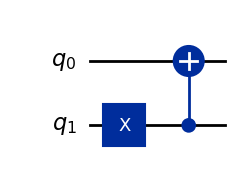

<IPython.core.display.Latex object>

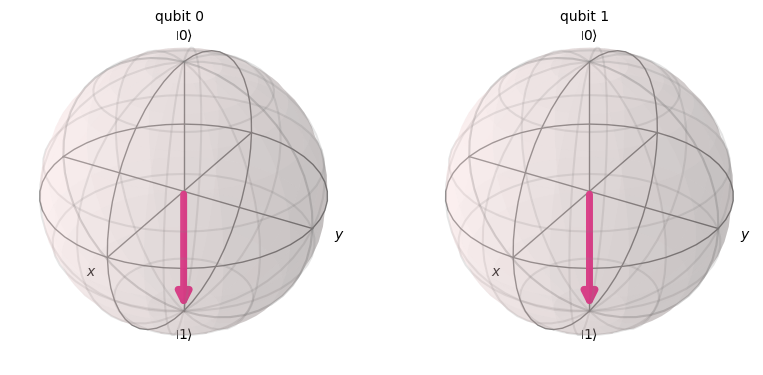

In [4]:
circ8 = QuantumCircuit(2)   # circuito con 2 qubits

circ8.x(1)                  # ponemos el control en |1> para que la compuerta sea aplicada

circ8.cx(1, 0)              # CNOT con q1 como control y q0 como objetivo

print("Este es el caso para CNOT(1,0)|10> = |11>")

display(circ8.draw('mpl'))

op = Operator(circ8)
display(array_to_latex(op))

psi = Statevector(circ8)

print()
display(plot_bloch_multivector(psi))

<a id="1.3.2"></a>
### 1.3.2. Compuertas controladas

Así como podemos controlar si aplicar la compuerta $X$ de acuerdo al estado de un qubit control, podemos controlar cualquier otra compuerta. Si tenemos la compuerta $U$, su versión controlada sería $CU$, y podemos decidir cual qubit es el control y cual es el objetivo (como para el caso de $CNOT$).

Una operación unitaria en general la podemos escribir como,

$$U=\mymatrix{rr}{ u_{11} & u_{12} \\ u_{21} & u_{22} }$$

Entonces su versión controlada $CU$, si el control es el qubit de la izquierda ($\ket{q_1}$), tendría las transiciones:

$CU_{1,0}\ket{00}=\ket{00}$

$CU_{1,0}\ket{01}=\ket{01}$

$CU_{1,0}\ket{10}=\ket{1}\otimes U\ket{0}=\ket{1}\otimes \left(u_{11}\ket{0}+u_{21}\ket{1}\right)$

$CU_{1,0}\ket{11}=\ket{1}\otimes U\ket{0}=\ket{1}\otimes \left(u_{12}\ket{0}+u_{22}\ket{1}\right)$

Su forma matricial es,

$$CU=\mymatrix{rrrr}{ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & u_{11} & u_{12} \\ 0 & 0 & u_{21} & u_{22} }$$

En Qiskit existen varias compuertas controladas predefinidas, en el siguiente código se usarán algunas a modo de ejemplo:

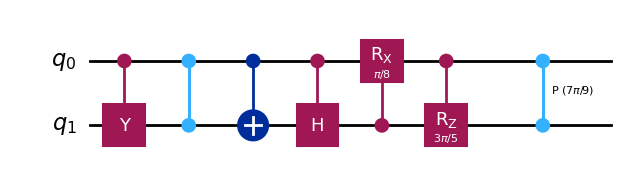

In [5]:
circ9 = QuantumCircuit(2)    # circuito con 2 qubits

circ9.cy(0, 1)               # Y controlada, qubit control es q0, y objetivo es q1
circ9.cz(1, 0)               # Z controlada, qubit control es q1, y objetivo es q0
circ9.cx(0, 1)               # X controlada, qubit control es q0, y objetivo es q1

circ9.ch(0, 1)               # H controlada, qubit control es q0, y objetivo es q1

circ9.crx(np.pi/8, 1, 0)     # Rx controlada, ángulo de pi/8, qubit control es q1, y objetivo es q0
circ9.crz(3*np.pi/5, 0, 1)   # Rz controlada, ángulo de 3pi/5, qubit control es q0, y objetivo es q1

circ9.cp(7*np.pi/9, 1, 0)    # P controlada, ángulo de 7pi/9, qubit control es q1, y objetivo es q0

display(circ9.draw('mpl'))

En Qiskit también podemos hacer controlada una compuerta particular, en general se usa esta funcionalidad para los casos en los que la compuerta es personalizada, ya que Qiskit incluye la version controlada de la mayoría de las compuertas de un qubit.

Creamos una compuerta personalizada con la clase `UnitaryGate`, a la que le debemos indicar la matriz que define a la operación, recordando que dicha matriz debe ser unitaria. Veamos un ejemplo:

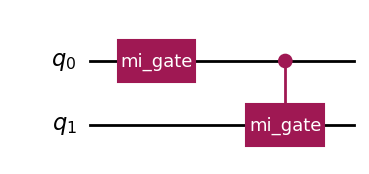

In [6]:
from qiskit.circuit.library import UnitaryGate

matrix = [[1j, 0],
          [0 , 1,]]

mi_gate = UnitaryGate(matrix, 'mi_gate')

circ10 = QuantumCircuit(2)      # circuito con 2 qubits

circ10.append(mi_gate, [0])     # le agregamos al circuito la compuerta personalizada


mi_gate_controlada = mi_gate.control(1)   # hacemos la version controlada de mi_gate

circ10.append(mi_gate_controlada, [0, 1]) # se indican los qubits, primero el control y luego el objetivo


display(circ10.draw('mpl'))

<a id="1.3.3"></a>
### 1.3.3. Compuerta $SWAP$

Esta compuerta es la única compuerta de dos qubits que no representa una operación controlada. $SWAP$ simplemente intercambia dos qubits. Es muy útil cuando se tiene restricción fisica en las conexiones entre qubits.

Sus transiciones son entonces,

$$SWAP \, \ket{00}=\ket{00}$$
$$SWAP \, \ket{01}=\ket{10}$$
$$SWAP \, \ket{10}=\ket{01}$$
$$SWAP \, \ket{11}=\ket{11}$$

Su representación matricial es,

$$SWAP=\mymatrix{rrrr}{ 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 }$$

La compuerta $SWAP$ puede descomponerse como,

$$SWAP = \frac{I\otimes I+X\otimes X+Y\otimes Y+Z\otimes Z}{2}$$

En Qsikit la podemos usar con `swap()` como sigue:

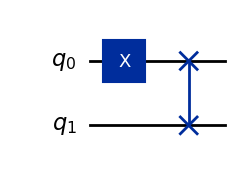

👉 Estado inicial:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>


👉 Estado después de SWAP:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>


🔵 Estado inicial:


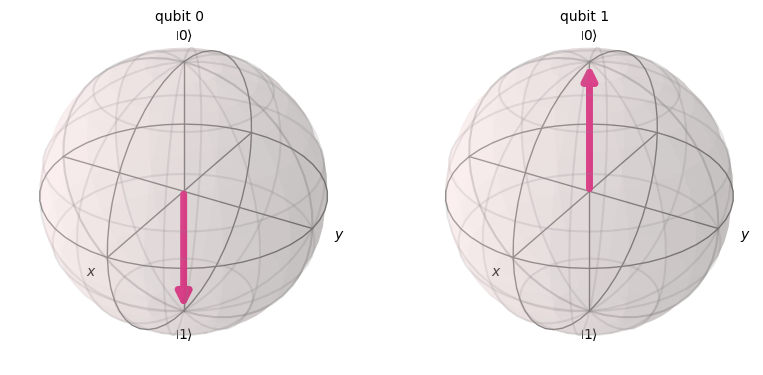

🔵 Estado después de SWAP:


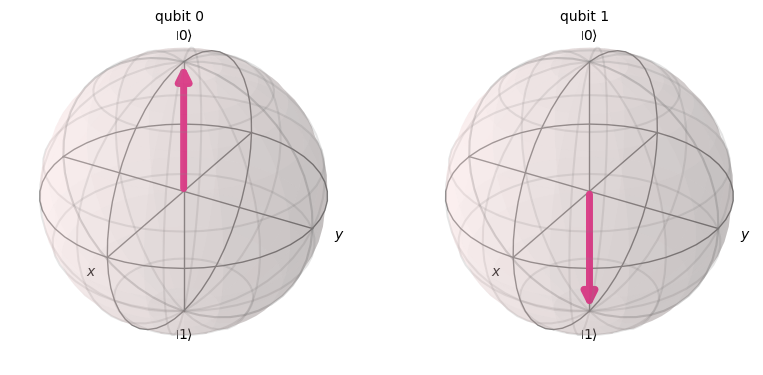

In [7]:
circ11 = QuantumCircuit(2)    # circuito con 2 qubit

circ11.x(0)                   # obtener el estado |01>

psi_0 = Statevector(circ11)   # estado justo después de crear el circuito e iniciar el qubit en |01>

circ11.swap(0, 1)             # aplicar compuerta SWAP a los dos quibits existentes

psi_1 = Statevector(circ11)   # estado después aplicar la compuerta Z

display(circ11.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de SWAP:")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de SWAP:")
display(plot_bloch_multivector(psi_1))

<a id="1.4"></a>
## 1.4. Compuertas de más qubits

Las compuertas pueden estar definidas para $n$ cantidad de qubits, siempre y cuando su matriz sea unitaria. Las compuertas de más de dos qubits suelen ser compuertas con más de un control.

<a id="1.4.1"></a>
### 1.4.1. Compuerta Toffoli , $CCNOT$ o $CCX$

Es una compuerta de 3 qubits. Aplicará un $NOT$ si los dos qubits de control están en el estado $\ket{1}$, en caso contrario no aplicará ninguna operación.

Su forma matricial para el caso de que los dos qubits de la izquierda sean los controles, y el de más a la derecha sea el objetivo es como sigue,

$$CCX = \mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0}$$

Entonces sus transiciones son,

$$CCX \, \ket{000} = \ket{000}$$
$$CCX \, \ket{001} = \ket{001}$$
$$CCX \, \ket{010} = \ket{010}$$
$$CCX \, \ket{011} = \ket{011}$$
$$CCX \, \ket{100} = \ket{100}$$
$$CCX \, \ket{101} = \ket{101}$$
$$CCX \, \ket{110} = \ket{111}$$
$$CCX \, \ket{111} = \ket{110}$$

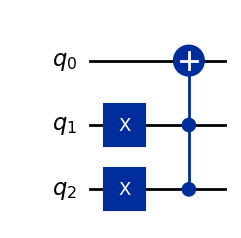

👉 Estado inicial:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>


👉 Estado después de CCX(1, 2, 0):
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>


🔵 Estado inicial:


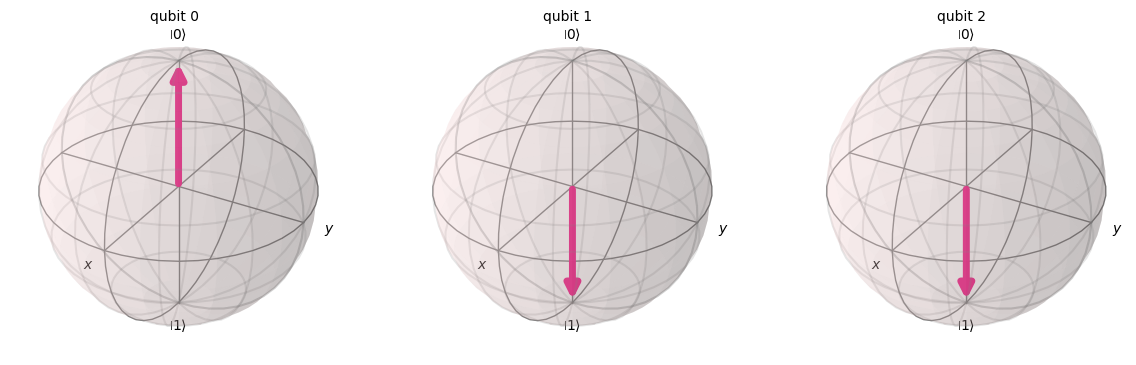

🔵 Estado después de CCX(1, 2, 0):


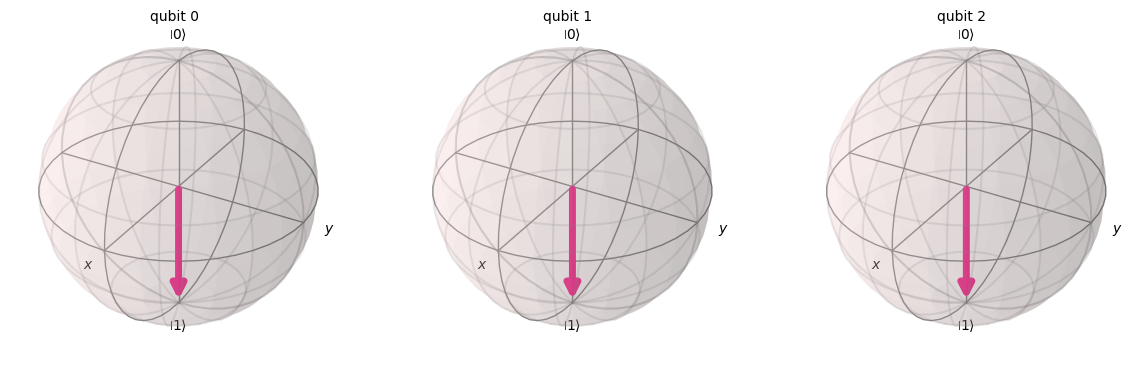

In [8]:
circ12 = QuantumCircuit(3)    # circuito con 3 qubit

circ12.x(1)                   # obtener el estado |010>
circ12.x(2)                   # obtener el estado |110>

psi_0 = Statevector(circ12)   # estado justo después de crear el circuito e iniciar el qubit en |110>

circ12.ccx(1, 2, 0)           # aplicar compuerta CCX: control1, control2, objetivo

psi_1 = Statevector(circ12)   # estado después aplicar la compuerta Z

display(circ12.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de CCX(1, 2, 0):")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de CCX(1, 2, 0):")
display(plot_bloch_multivector(psi_1))

<a id="1.4.2"></a>
### 1.4.2. Compuerta Fredkin o $CSWAP$

Esta compuerta tiene un qubit de control, y si está en el estado $\ket{1}$, entonces se efectúa un $SWAP$ a los dos quibits objetivo. La forma matricial es como sigue:

$$CSWAP = \mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1}
$$

Entonces sus transiciones son,

$$CSWAP \ket{000} = \ket{000}$$
$$CSWAP \ket{001} = \ket{001}$$
$$CSWAP \ket{010} = \ket{010}$$
$$CSWAP \ket{011} = \ket{011}$$
$$CSWAP \ket{100} = \ket{100}$$
$$CSWAP \ket{101} = \ket{110}$$
$$CSWAP \ket{110} = \ket{101}$$
$$CSWAP \ket{111} = \ket{111}$$
    

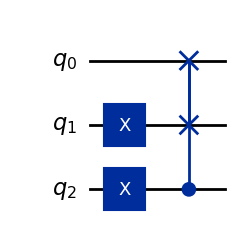

👉 Estado inicial:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>


👉 Estado después de SWAP(2, 0, 1):
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>


🔵 Estado inicial:


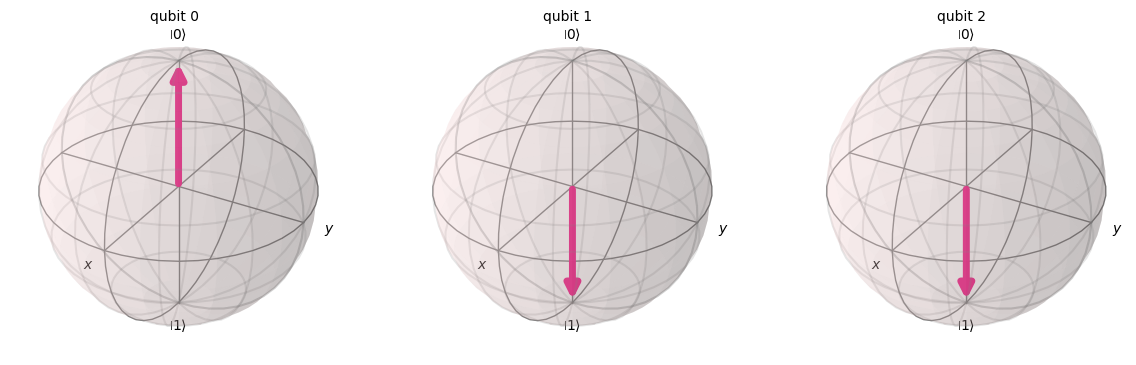

🔵 Estado después de SWAP(2, 0, 1):


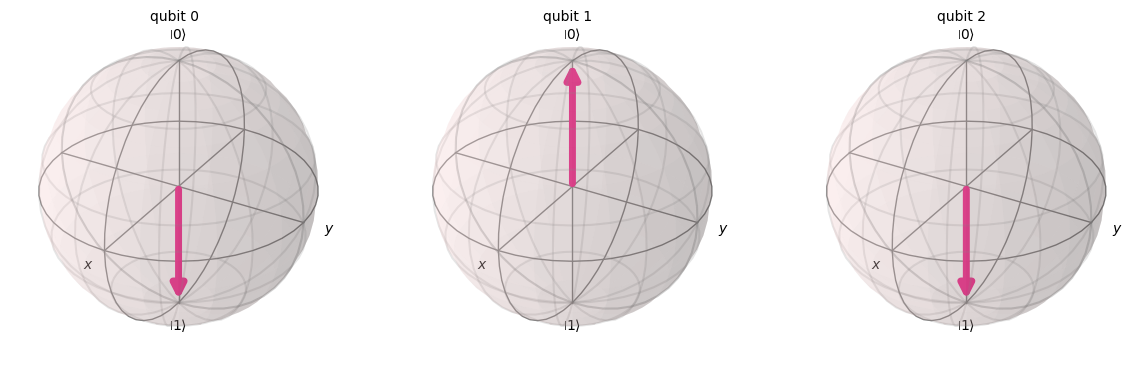

In [9]:
circ13 = QuantumCircuit(3)    # circuito con 3 qubit

circ13.x(2)                   # obtener el estado |100>
circ13.x(1)                   # obtener el estado |110>

psi_0 = Statevector(circ13)   # estado justo después de crear el circuito e iniciar el qubit en |110>

circ13.cswap(2, 0, 1)         # aplicar compuerta CCX: control1, objetivo1, objetivo2

psi_1 = Statevector(circ13)   # estado después aplicar la compuerta Z

display(circ13.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de SWAP(2, 0, 1):")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de SWAP(2, 0, 1):")
display(plot_bloch_multivector(psi_1))

<a id="1.4.3"></a>
### 1.4.3. Compuerta controlada personalizada

Compuerta personalizada en Qiskit, con dos controles y dos objetivos:

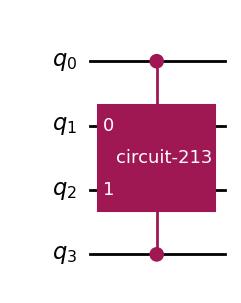

In [10]:
# Crear una compuerta a partir de un circuito
qc1 = QuantumCircuit(2)
# estos dos qubits serán los objetivos
qc1.x(0)
qc1.h(1)
custom = qc1.to_gate().control(2) # se indica que debe ser controlada con dos qubits

# Aplicar esa compuerta a otro circuito
qc2 = QuantumCircuit(4)
qc2.append(custom, [0, 3, 1, 2]) # primeros 2 son control, el resto a los que se aplica la compuerta
qc2.draw('mpl')

<a id="2"></a>
# 2. Estados de Bell: Entrelazamiento

Existen estados particulares con su propio nombre, tal es el caso de los estados de Bell. Son relevantes porque una vez creados dichos estados, se tiene que los dos qubits que los conforman están *entrelazados*. Representan los ejemplos más simples del [entrelazamiento cuántico](https://en.wikipedia.org/wiki/Quantum_entanglement).

Que los qubits estén entralazados significa que el estado no puede ser separado en el producto tensorial de dos qubits como $\ket{a}\otimes\ket{b}$.

Conozcamos los 4 estados de Bell:

$$\ket{\Phi^+}=\frac{1}{\sqrt2}\Big(\ket{00}+\ket{11}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 1 }$$

$$~~~\ket{\Phi^-}=\frac{1}{\sqrt2}\Big(\ket{00}-\ket{11}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 1 \\ 0 \\ 0 \\ -1 }$$

$$\ket{\Psi^+}=\frac{1}{\sqrt2}\Big(\ket{01}+\ket{10}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 0 \\ 1 \\ 1 \\ 0 }$$

$$~~~\ket{\Psi^-}=\frac{1}{\sqrt2}\Big(\ket{01}-\ket{10}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 0 \\ 1 \\ -1 \\ 0 }$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Confirmar que el estado $\ket{\Phi^+}$ no puede ser separado como $\ket{a}\otimes\ket{b}$.

Supongamos que si se puede, entonces se debe cumplir que,
    
$$\ket{a}\otimes\ket{b}=\mymatrix{r}{ a_1 \\ a_2 }\otimes\mymatrix{r}{ b_1 \\ b_2 }=\mymatrix{r}{ a_1b_1 \\ a_1b_2 \\ a_2b_1 \\ a_2b_2 }=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 1 }$$
    
Entonces $a_1b_2=0$, lo que implica que $a_1=0$ o que $b_2=0$, si $a_1=0$ entonces no puede cumplirse que $a_1b_1=1$, y si en cambio sucede que $b_2=0$, entonces hay contradicción con $a_2b_2=1$.
    
Por lo tanto no es posible expresar el estado $\ket{\Phi^+}$ como el producto tensorial de dos qubits separados ($\ket{a}\otimes\ket{b}$).

Veamos como generar los estados de Bell en Qiskit:

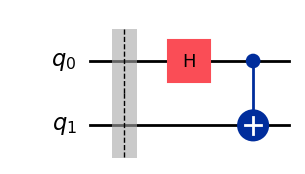

👉 Estado de Bell 1:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>

In [11]:
circ_bell_1 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_1.barrier()
circ_bell_1.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_1.cx(0,1)                # aplicar compuerta CNOT

psi_bell_1 = Statevector(circ_bell_1)   # estado final

display(circ_bell_1.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 1:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_1))
print("➤ en forma de ket:")
display(psi_bell_1.draw('latex'))

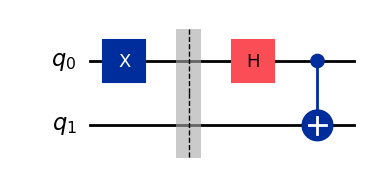

👉 Estado de Bell 2:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>

In [12]:
circ_bell_2 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_2.x(0)                   # aplicar compuerta X al qubit 0
circ_bell_2.barrier()
circ_bell_2.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_2.cx(0,1)                # aplicar compuerta CNOT

psi_bell_2 = Statevector(circ_bell_2)   # estado final

display(circ_bell_2.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 2:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_2))
print("➤ en forma de ket:")
display(psi_bell_2.draw('latex'))

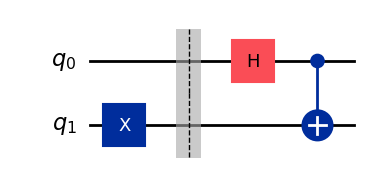

👉 Estado de Bell 2:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>

In [13]:
circ_bell_3 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_3.x(1)                   # aplicar compuerta X al qubit 1
circ_bell_3.barrier()
circ_bell_3.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_3.cx(0,1)                # aplicar compuerta CNOT

psi_bell_3 = Statevector(circ_bell_3)   # estado final

display(circ_bell_3.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 2:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_3))
print("➤ en forma de ket:")
display(psi_bell_3.draw('latex'))

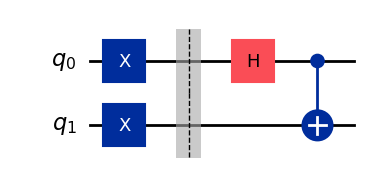

👉 Estado de Bell 2:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>

In [14]:
circ_bell_4 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_4.x(0)                   # aplicar compuerta X al qubit 0
circ_bell_4.x(1)                   # aplicar compuerta X al qubit 1
circ_bell_4.barrier()
circ_bell_4.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_4.cx(0,1)                # aplicar compuerta CNOT

psi_bell_4 = Statevector(circ_bell_4)   # estado final

display(circ_bell_4.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 2:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_4))
print("➤ en forma de ket:")
display(psi_bell_4.draw('latex'))

¿Qué pasa si queremos ver un estado entrelazado usando esferas de Bloch?

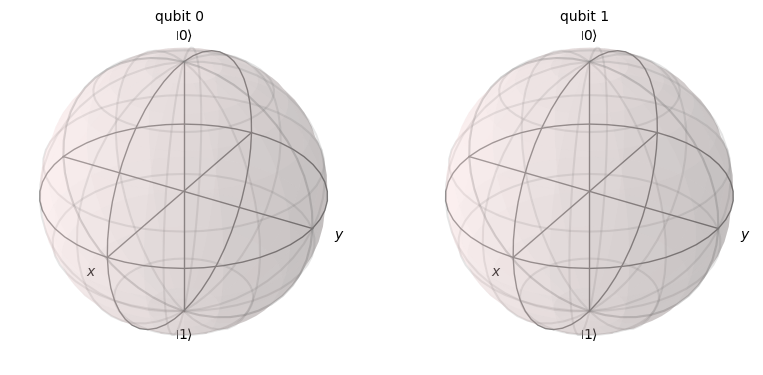

In [15]:
display(plot_bloch_multivector(psi_bell_4))

No se ven los vectores, esto debido a que los estados están entrelazados y por lo tanto no podemos tener una representación con producto tensorial de dos qubits como $\ket{a}\otimes\ket{b}$, al no existir $\ket{a}$ o $\ket{b}$, no tenemos vectores que puedan ser dibujados sobre esferas de Bloch.

<a id="3"></a>
# 3. QSphere, otra forma de visualizar estados multi-qubit

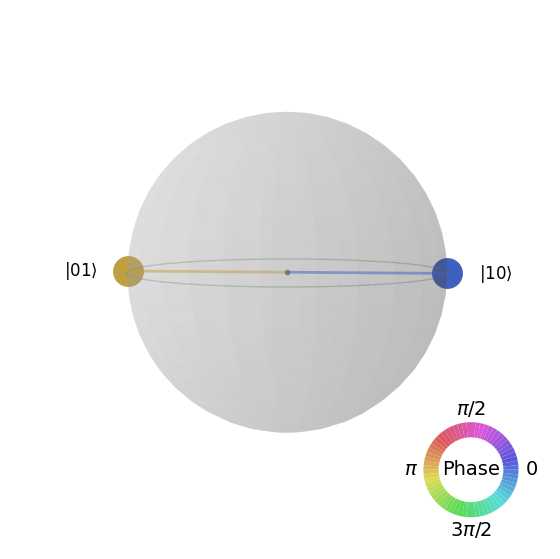

In [16]:
psi_bell_4.draw('qsphere')

La QSphere representa el estado de un sistema de uno o más qubits al asociar cada estado base computacional con un punto en la superficie de una esfera. Un nodo es visible en cada punto. El radio de cada nodo es proporcional a la probabilidad ($p_k$) de su estado base, mientras que el color del nodo indica la fase cuántica ($\phi_k$).

Los nodos se disponen en la QSphere de modo que el estado base con todos ceros (p. ej. $\ket{000}$), está en el polo norte, y el estado base con todos unos (p. ej., $\ket{111}$) está en el polo sur. Los estados base con el mismo número de ceros (o unos) se encuentran en una latitud compartida de la QSphere (por ejemplo, $\ket{001}$, $\ket{010}$, $\ket{100}$). Comenzando en el polo norte y avanzando hacia el sur, cada latitud sucesiva tiene estados base con un mayor número de unos; la latitud de un estado base está determinada por su [distancia de Hamming](https://en.wikipedia.org/wiki/Hamming_distance) desde el estado 0. La QSphere contiene información completa sobre el estado cuántico en una representación compacta.

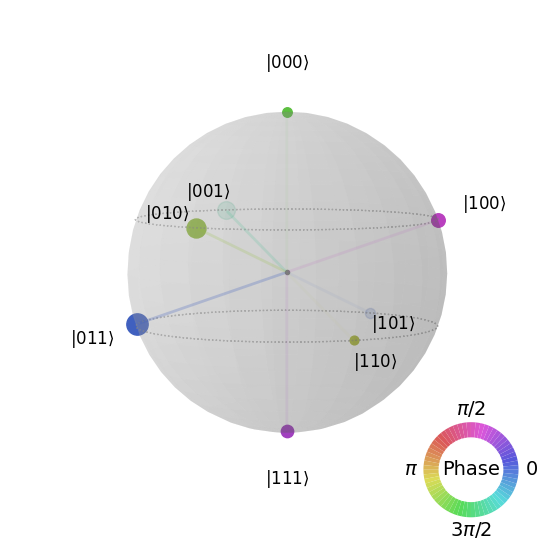

In [17]:
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_state_qsphere


estado_aleatorio_3qubits = random_statevector(2**3)

plot_state_qsphere(estado_aleatorio_3qubits)

Es importante resaltar que la QSphere no es lo mismo que la esfera de Bloch, ni siquiera para un solo qubit. De hecho, la esfera de Bloch brinda una vista local del estado cuántico, donde cada qubit se ve por sí solo. Al tratar de comprender cómo se comportan los registros de qubits (estados de múltiples qubits) con la aplicación de circuitos cuánticos, es más revelador tener una visión global y observar el estado cuántico en su totalidad. La QSphere proporciona una representación visual del estado cuántico y, por lo tanto, de este punto de vista global.

Cabe señalar que la QSphere tiene un máximo de 5 qubits, es decir, estados de más qubits no pueden ser visualizados de esta forma.

<a id="4"></a>
# 4. Simular Circuitos Cuánticos

Ya sabemos crear cicuitos y manipular sus qubits. Lo que sigue es ejecutar dichos circuitos y obtener las ventajas de la parte cuántica, es decir, permitir que las probabiliadades entren en juego al momento de observar los resultados.

Hasta ahora, hemos mostrado información sobre el estado final (e intermedios) suponiendo un circuito ideal y sin forzar un colapso del resutado, hemos visto el estado como si solo efectuaramos las operaciones matemáticas, comprobando que las mismas funcionan, pero no hemos hecho nada cuántico.

Sin embargo, un experimento real termina midiendo cada qubit (normalmente sobre la base computacional $\{\ket{0}, \ket{1}\}$). Sin medición, no podemos obtener información sobre el estado. **Las mediciones hacen que el sistema cuántico colapse en bits clásicos**.

Supongamos el siguiente estado de $3$ qubits, conocido como [estado GHZ](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state),

$$\ket{\psi}=\frac{1}{\sqrt2}\Big(\ket{000}+\ket{111}\Big)$$

Denotemos la cadena de bits resultane como $abc$. Recordemos que, bajo el etiquetado de qubits utilizado por Qiskit ($\ket{q_2q_1q_0}$), $a$ correspondería al resultado en el qubit 2, $b$ al resultado en el qubit 1, y $c$ al resultado en qubit 0.

Ahora, la probabilidad de obtener un resultado $abc$ viene dada por,

$$Pr(abc)=|\braket{abc}{\psi}|^2$$

En particular para el estado GHZ, la probabilidad de obtener $000$ o $111$ es $\frac{1}{2}$.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Calcular la probabilidad de medir $111$ en el estado $\ket{\psi}=\frac{1}{\sqrt2}\Big(\ket{000}+\ket{111}\Big)$.

Utilizamos la ecuación indicada para calcular la probabilidad,
    
$$\begin{aligned}
\Pr(111)&=|\braket{111}{\psi}|^2\\
&=\left|\left\langle 111\Bigg|\frac{1}{\sqrt2}\Big(\ket{000}+\ket{111}\Big)\right\rangle\right|^2\\
&=\left|\frac{1}{\sqrt2}\left\langle 111\Bigg|\Big(\ket{000}+\ket{111}\Big)\right\rangle\right|^2\\
&=\left|\frac{1}{\sqrt2}\Bigg(\left\langle 111\Big|000\right\rangle+\left\langle 111\Big|111\right\rangle\Bigg)\right|^2\\
&=\left|\frac{1}{\sqrt2}\Big(0+1\Big)\right|^2\\
&=\left|\frac{1}{\sqrt2}\right|^2\\
&=\frac{1}{2}
\end{aligned}$$


Para poder simular un circuito, es necesario indicar que qubits queremos medir y elegir en dónde queremos guardar la medición, que serán bits clásicos y necesitamos uno por cada qubit a medir.

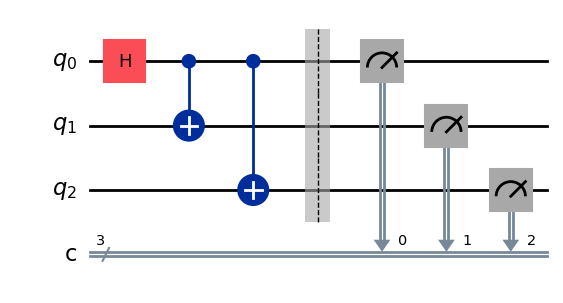

In [18]:
circ_ghz = QuantumCircuit(3, 3)     # circuito con 3 qubits y 3 bits clásicos

circ_ghz.h(0)                       # aplicar compuerta H al qubit 0
circ_ghz.cx(0, 1)                   # aplicar compuerta CNOT a los qubits 0 y 1
circ_ghz.cx(0, 2)                   # aplicar compuerta CNOT a los qubits 0 y 2
circ_ghz.barrier()
circ_ghz.measure([0,1,2], [0,1,2])  # medir los 3 qubits en los 3 bits clásicos

circ_ghz.draw('mpl')                # mostrar el circuito

Con la clase `BasicSimulator` podemos obtener de manera rápida y básica el resultado de la ejecución de circuitos cuánticos con pocos qubits (max 24); es una implementación en Python de un simulador cuántico no muy eficiente. Solo puede simular un conjunto limitado de compuertas cuánticas. Nos dara las mediciones en la base computacional.

In [19]:
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic = BasicSimulator()

In [20]:
job = simulator_basic.run(circ_ghz, shots=1024)
result = job.result()
result

Result(backend_name='basic_simulator', backend_version='0.1', qobj_id='6bceec33-7baf-4746-82a7-528da4320a5d', job_id='3349fdc7-1f4d-4408-b5a8-6875398aefb0', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 522, '0x0': 502}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2]], n_qubits=3, qreg_sizes=[['q', 3]], clbit_labels=[['c', 0], ['c', 1], ['c', 2]], memory_slots=3, creg_sizes=[['c', 3]], name='circuit-236', global_phase=0.0, metadata={}), status=DONE, name='circuit-236', seed_simulator=np.int32(190551826), time_taken=0.0013301372528076172)], date=None, status=COMPLETED, header=QobjHeader(backend_name='basic_simulator', backend_version='0.1'), time_taken=0.0013370513916015625)

In [21]:
counts = result.get_counts()
counts

{'111': 522, '000': 502}

Graficamos los resultados usando un histograma:

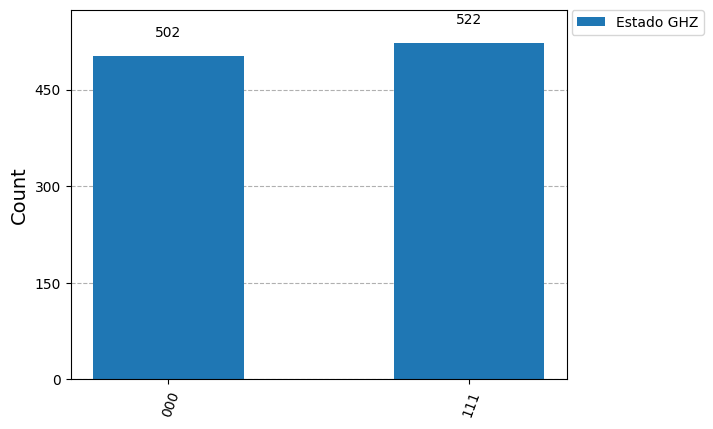

In [22]:
from qiskit.visualization import plot_histogram

plot_histogram(counts, legend=["Estado GHZ"])

Usamos la clase `Sampler` para medir los qubits en la base $Z$ (la base física en la que se miden los qubits). El `Sampler` contará el número de resultados del estado GHZ, normalizados por el número de iteraciones (shots) (experimentos realizados). El `Sampler` también ofrece la capacidad de realizar fácilmente la mitigación de errores, lo que modifica este cálculo y, por lo tanto, los resultados se denominan *cuasiprobabilidades*.

Las mediciones deben estar presentes en el circuito cuando se usa la primitiva `Sampler`, luego se crea una instancia de `Sampler` y se usa el método `run()` para enviar los circuitos al backend.

In [23]:
from qiskit.primitives import Sampler

sampler = Sampler()                   # crear objeto de tipo Sampler

job_sampler = sampler.run(circ_ghz)   # ejecutar el circuito usando Sampler

job_sampler.result().quasi_dists      # obtener las cuasi-probabilidades

[{0: np.float64(0.5), 7: np.float64(0.5)}]

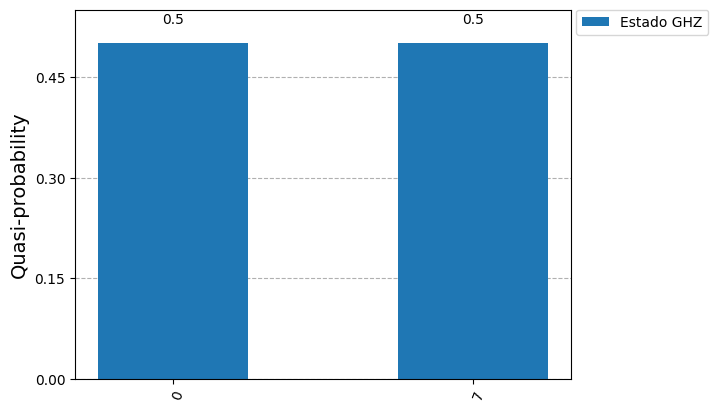

In [24]:
from qiskit.visualization import plot_histogram

plot_histogram([job_sampler.result().quasi_dists[0]], legend=["Estado GHZ"])

Notemos que los resultados tienen las etiquetas `0` y `7`, estas etiquetas representan el estado escrito usando la base decimal, y para saber el estado cuántico que representan, debemos calcular el valor en base binaria, es decir,

$$0_{decimal} = 000_{binario} \; \rightarrow \; \ket{000}$$

$$7_{decimal} = 111_{binario} \; \rightarrow \; \ket{111}$$

El resultado es aproximadamente la mitad para el estado $|000\rangle$ y la mitad para el estado $|111\rangle$, esto se debe a la definición del estado GHZ.

El resultado por defecto es dado con los valores en base decimal, sin embargo, es posible preguntar por los valores en base binaria como sigue:

In [25]:
job_sampler.result().quasi_dists[0].binary_probabilities()

{'000': np.float64(0.4999999999999999), '111': np.float64(0.4999999999999999)}

<a id="4.1"></a>
## 4.1. Primitivas de Qiskit Runtime

En computación, una primitiva es una instrucción de procesamiento pequeña o un tipo de dato, para un nivel de abstracción dado. En pocas palabras, puedes pensar en las primitivas como los bloques de construcción más simples que se le puede dar a un usuario para crear algo útil. Desde la perspectiva del usuario, son cajas negras que “hacen algo que necesito pero no me importan los detalles específicos de cómo se logra”. Abstraen los detalles de implementación.

En el contexto de la computación cuántica, definir una capa de abstracción es un desafío en este momento, porque la mayoría de las aplicaciones de alto nivel requieren al menos cierto grado de cuidado con respecto a los aspectos de bajo nivel, como las especificaciones de hardware (mapas de acoplamiento, por ejemplo). Sin embargo, mientras la comunidad construye colectivamente un modelo computacional para un futuro de computación cuántica útil, han comenzado a surgir algunos candidatos para primitivas. Esto ha llevado a la creación de `Estimator` y `Sampler`.

Una primitiva `Estimator` calcula los valores esperados de los observables con respecto a los estados preparados por los circuitos cuánticos. Los usuarios generalmente especifican una lista de circuitos, observables y posiblemente alguna configuración adicional, con la cual el programa puede evaluar de manera eficiente los valores esperados y las variaciones.

Una primitiva `Sampler` calcula probabilidades o cuasiprobabilidades de cadenas de bits de circuitos cuánticos. Las cuasiprobabilidades son similares a las probabilidades regulares, excepto que pueden incluir valores negativos, lo que puede ocurrir cuando se usan ciertas técnicas de mitigación de errores.

Las primitivas en general permiten a un usuario de alto nivel escribir algoritmos cuánticos sin preocuparse por los detalles del hardware. Por lo tanto, las tareas no triviales, como la estimación de un operador, por ejemplo, se pueden manejar con un bajo nivel sin necesidad de que el usuario tenga que indicar todos los detalles.


Veamos un par de ejemplos sencillos, los estados:

$$\ket{1} \; \text{y} \; \ket{+}$$

Creamos estos estados con Qiskit:

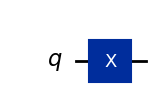

In [26]:
# crear el estado |1>

qc_1 = QuantumCircuit(1)
qc_1.x(0)
qc_1.draw('mpl')

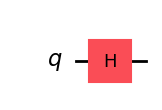

In [27]:
# crear el estado |+>

qc_mas = QuantumCircuit(1)
qc_mas.h(0)
qc_mas.draw('mpl')

<a id="4.1.1"></a>
## 4.1.1. Primitiva Sampler

Primero usamos la primitiva `Sampler` para medir los qubits en la base $Z$. El `Sampler` contará el número de resultados del estado $|0\rangle$ y $|1\rangle$, normalizados por el número de iteraciones o *shots* (experimentos realizados).

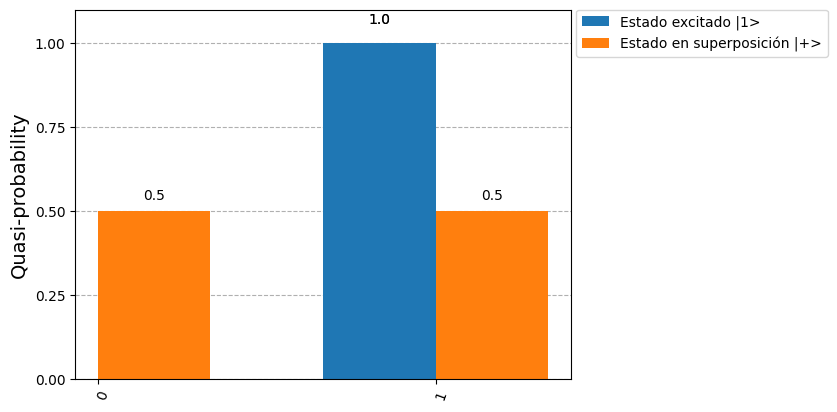

In [28]:
qc_1.measure_all()      # agregamos las mediciones, en este caso al único qubit
qc_mas.measure_all()    # agregamos las mediciones, en este caso al único qubit

sampler = Sampler()
job_1 = sampler.run(qc_1)
job_mas = sampler.run(qc_mas)


# graficamos los resultados con un histograma

legend = ["Estado excitado |1>", "Estado en superposición |+>"]
plot_histogram([job_1.result().quasi_dists[0], job_mas.result().quasi_dists[0]], legend=legend)

El resultado para el estado excitado ($|1\rangle$) es siempre $1$, mientras que para el estado de superposición positiva (estado más, $\ket{+}$) es aproximadamente la mitad de las veces $0$ y la otra mitad $1$. Esto se debe a que los estados $|0\rangle$ y $|1\rangle$ son *estados propios* del operador $Z$ (con [valores propios](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) $+1$ y $-1$, respectivamente).

Cambiemos y midamos en la base $X$. Usando `Sampler` debemos rotar el qubit de la base $X$ a la base $Z$ para la medición (porque esa es la única base en la que podemos realizar la medición).

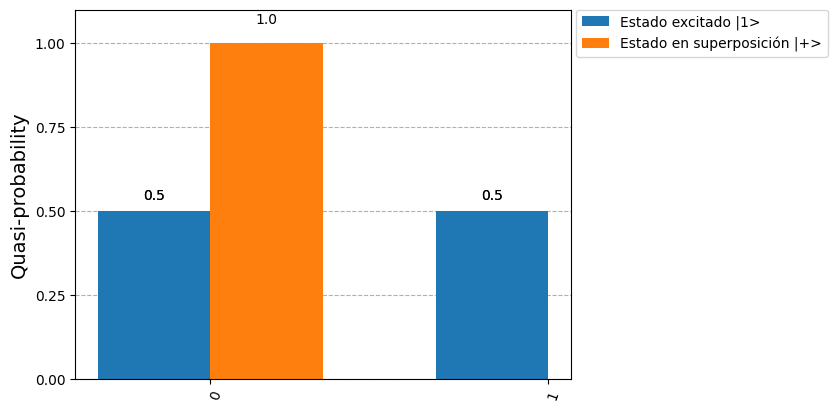

In [29]:
qc_1.remove_final_measurements()
qc_mas.remove_final_measurements()

# rotar hacia la base X
qc_1.h(0)
qc_mas.h(0)

qc_1.measure_all()
qc_mas.measure_all()


sampler = Sampler()
job_1 = sampler.run(qc_1)
job_mas = sampler.run(qc_mas)


# graficamos los resultados con un histograma

legend = ["Estado excitado |1>", "Estado en superposición |+>"]
plot_histogram([job_1.result().quasi_dists[0], job_mas.result().quasi_dists[0]], legend=legend)

Ahora vemos lo contrario, el estado de la superposición positiva ($\ket{+}$) siempre da el resultado $1$, por lo tanto, es un estado propio del operador $X$, mientras que el estado excitado ($|1\rangle$) produce los resultados $0$ y $1$ con cincuenta por ciento cada uno aproximadamente. Los estados $|+\rangle$ y $|-\rangle$ son estados propios del operador $X$, con valores propios $+1$ y $-1$, respectivamente. Es bueno recordar esto al considerar cómo funciona el `Estimator` en la siguiente subsección.

<a id="4.1.2"></a>
## 4.1.2 Primitiva Estimator

Las primitivas de Qiskit Runtime nos permiten abstraer la medición en la primitiva `Estimator`, donde se especifica un [observable](https://en.wikipedia.org/wiki/Observable). En particular, podemos usar los mismos circuitos, el estado excitado $|1\rangle$ y la superposición positiva $|+\rangle$. Sin embargo, en el caso del `Estimator`, *no* añadimos mediciones al circuito. En su lugar, especificamos una lista de observables que adoptan la forma de cadenas de Pauli. En nuestro caso, para una medición de un solo qubit, especificamos `'Z'` para la base $Z$ y `'X'` para la base $X$.

In [30]:
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp


qc_1 = QuantumCircuit(1)
qc_1.x(0)

qc_mas = QuantumCircuit(1)
qc_mas.h(0)

observables = list(SparsePauliOp(['Z', 'X']))


estimator = Estimator()
job2_1 = estimator.run([qc_1]*len(observables), observables=observables)
job2_mas = estimator.run([qc_mas]*len(observables), observables=observables)


print(f'    |       <Z>       |        <X>')
print(f'----|-------------------------------------')
print(f'|1> |      {job2_1.result().values[0]}       |        {job2_1.result().values[1]}')
print(f'|+> |       {job2_mas.result().values[0]}       | {job2_mas.result().values[1]}')

    |       <Z>       |        <X>
----|-------------------------------------
|1> |      -1.0       |        0.0
|+> |       0.0       | 0.9999999999999998


Al igual que antes, vemos que el valor esperado del estado $|1\rangle$ en la base $Z$ es $-1$ (correspondiente a su valor propio) y alrededor de cero en la base $X$ (que es el promedio de los valores propios $+1$ y $-1$), y de manera inversa para el estado $|+\rangle$ (pues el valor propio del operador $X$ es $+1$).

### Recordatorio: Valores esperados

En [mecánica cuántica](https://es.wikipedia.org/wiki/Mec%C3%A1nica_cu%C3%A1ntica), el valor esperado es la esperanza matemática probabilista del resultado (medición) de un experimento. Se puede considerar como un promedio de todos los resultados posibles de una medición según lo ponderado por su probabilidad y, como tal, no es el valor más probable de una medición; de hecho el valor esperado puede "[casi seguramente](https://es.wikipedia.org/wiki/Casi_seguramente)" tener cero probabilidad de ocurrir (por ejemplo, las mediciones que solo producen valores enteros pueden tener una medición no entera). Es un concepto fundamental en todas las áreas de mecánica cuántica.

Definición:

<div class="alert alert-block alert-success">
Considera un operador $A$. El valor esperado es entonces $\langle A\rangle = \langle \psi |A|\psi \rangle$ en notación de Dirac, con $|\psi \rangle$ un vector de estado normalizado.

El valor esperado de $A$ en el estado $\ket{\psi}$ está definido como,

$$ \langle A\rangle _{\psi }=\langle \psi |A|\psi \rangle $$	

Si $A$ tiene un conjunto completo de vectores propios $\phi_{j}$, con valores propios $a_{j}$, entonces la expresión anterior puede ser expresada como,

$$\langle A\rangle _{\psi }=\sum _{j}a_{j}|\langle \psi |\phi _{j}\rangle |^{2}$$


Esta expresión es similar al promedio aritmético e ilustra el significado físico del formalismo matemático: los valores propios $a_{j}$ son los posibles resultados del experimento, y su correspondiente coeficiente $|\langle \psi | \phi_j \rangle|^2$ es la probabilidad de que ocurra este resultado; a menudo se le llama probabilidad de transición.

<a id="5"></a>
# 5. Errores y cómo corregirlos

[NISQ](https://en.wikipedia.org/wiki/Noisy_intermediate-scale_quantum_era) (Noisy Intermediate-Scale Quantum) es un término acuñado por el físico [John Preskill](https://en.wikipedia.org/wiki/John_Preskill) para describir la era actual de la computación cuántica, caracterizada por la disponibilidad de dispositivos cuánticos con un número moderado de qubits (de decenas a cientos) que son susceptibles al ruido y a errores. En esta fase, los qubits aún no son perfectamente fiables y las correcciones de errores completas no son factibles debido a las limitaciones tecnológicas actuales.

<div align="center">
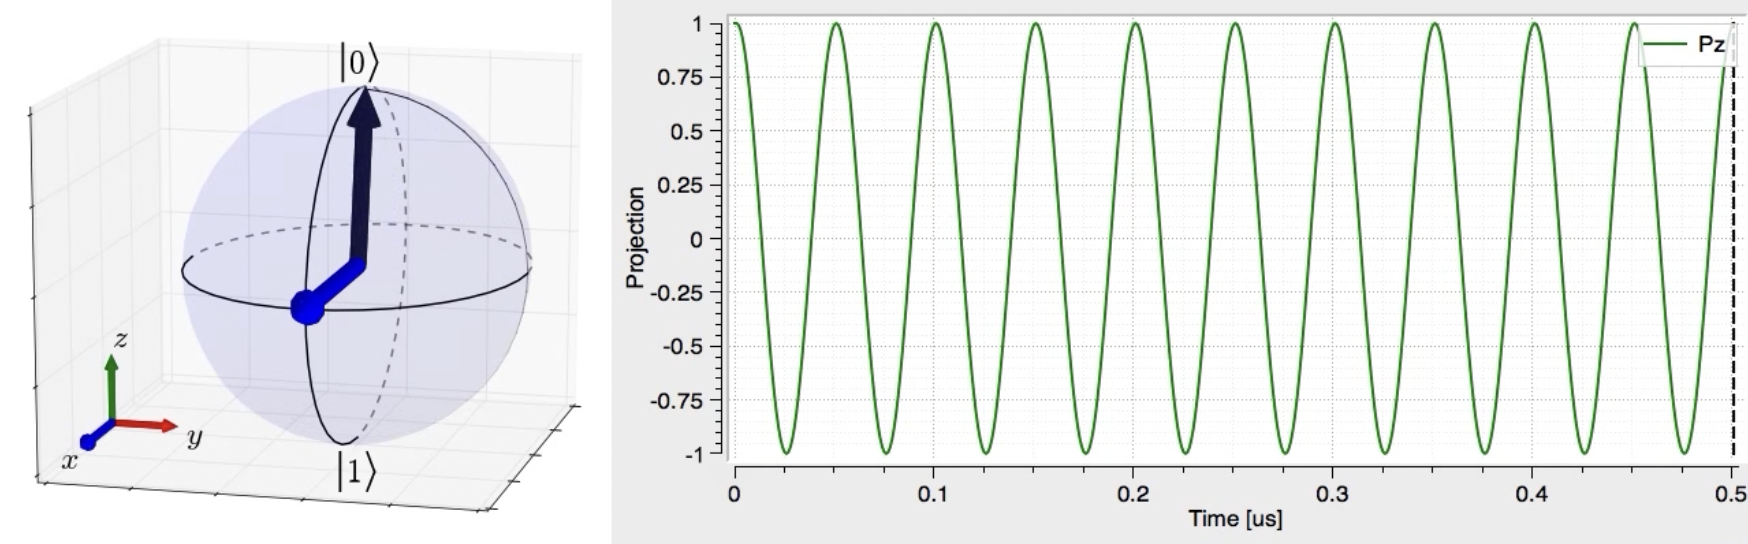

<div align="center">
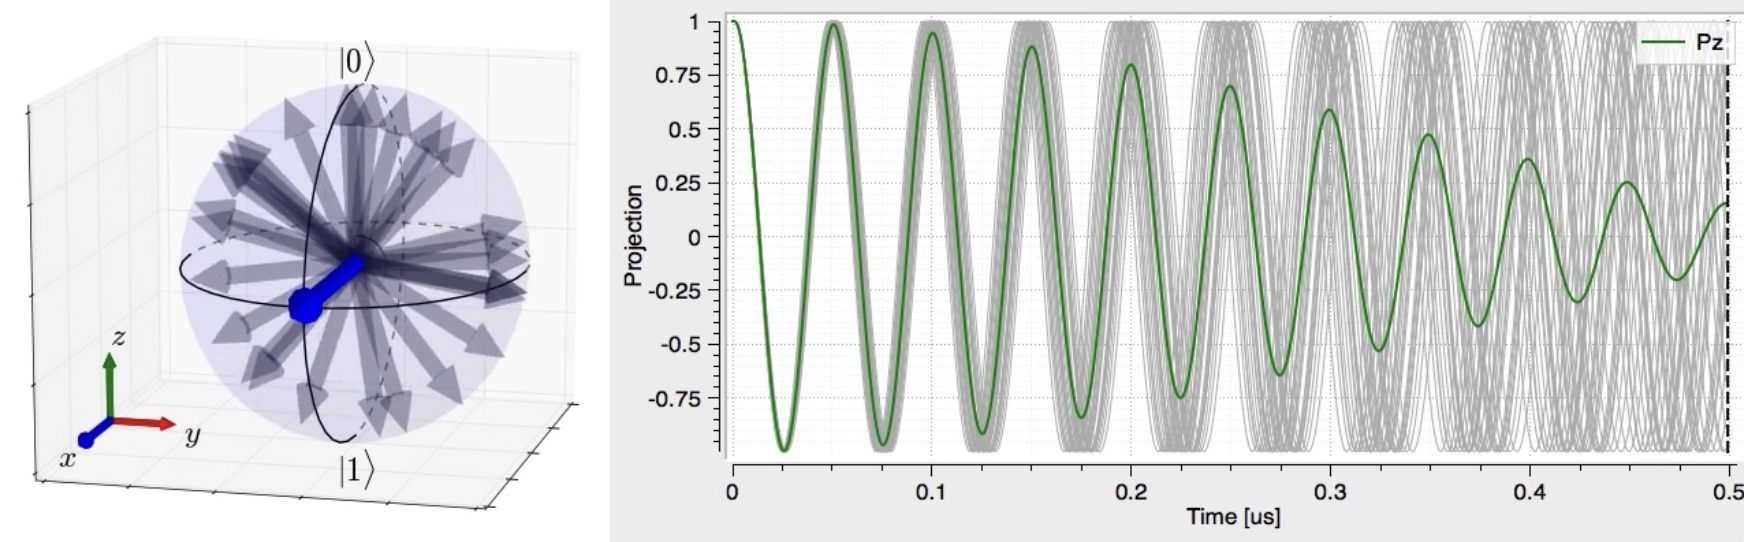

<a id="5.1"></a>
## 5.1. Mitigación de errores

La mitigación de errores es una técnica utilizada en computación cuántica para reducir el impacto de los errores sin necesidad de la redundancia de qubits o sobrecarga significativa en la computación. A diferencia de la corrección de errores, la mitigación de errores no intenta corregir los errores directamente, sino que busca minimizar su efecto en los resultados finales. Algunas de las estrategias más comunes para la mitigación de errores incluyen:

1. **Filtrado de resultados**: Se pueden aplicar filtros para eliminar mediciones que claramente han sido afectadas por errores.
2. **Extrapolación a ruido cero**: Este método implica ejecutar el mismo circuito cuántico con diferentes niveles de ruido (controlando parámetros como el tiempo de ejecución) y extrapolar los resultados a un escenario con ruido cero.
3. **Corrección basada en modelos**: Consiste en construir modelos del comportamiento del ruido en el hardware y usar estos modelos para ajustar los resultados medidos.
4. **Descomposición de operaciones**: Dividir operaciones cuánticas en sub-operaciones menos ruidosas y combinar los resultados para obtener una salida menos ruidosa.
5. **Averaging (promediado)**: Realizar múltiples ejecuciones del circuito y promediar los resultados para reducir el impacto de fluctuaciones aleatorias.

<a id="5.2"></a>
## 5.2. Corrección de errores

La corrección de errores cuánticos es un conjunto de técnicas más robusto y complejo que tiene como objetivo detectar y corregir los errores en qubits durante la computación cuántica. A diferencia de la mitigación de errores, la corrección de errores añade redundancia al sistema cuántico, utilizando múltiples qubits para proteger la información. Los principios y técnicas fundamentales incluyen:

1. **Codificación de la información**: Utilizar más de un qubit para representar un único qubit lógico. Por ejemplo, en el [código de Shor](https://errorcorrectionzoo.org/c/shor_nine), se utilizan 9 qubits físicos para representar 1 qubit lógico.
2. **Síndromes de error**: Medir síndromes de error que indican qué tipo de error ha ocurrido sin colapsar el estado cuántico. Esta información se utiliza para inferir y corregir el error.
3. **Códigos cuánticos**: Existen diversos códigos cuánticos, como el Código de Shor, el Código de Steane y los códigos CSS (Calderbank-Shor-Steane), cada uno con diferentes capacidades para detectar y corregir errores.
4. **Operaciones correctivas**: Una vez identificado el error, se aplican operaciones correctivas para devolver el qubit a su estado original.

La corrección de errores es esencial para la computación cuántica a gran escala porque los qubits son extremadamente susceptibles al ruido y a los errores operacionales. Implementar estas técnicas requiere un número significativo de qubits físicos, lo que actualmente representa un desafío debido a las limitaciones tecnológicas y la coherencia temporal de los qubits.

Para una lista más exhaustiva de algoritmos de corrección de errores (clásicos y cuánticos) visitar el [Error Correction Zoo](https://errorcorrectionzoo.org/).

<a id="5.3"></a>
## 5.3. Diferencias

- **Objetivo**: La mitigación de errores busca reducir el impacto de los errores en los resultados sin necesidad de corregirlos directamente, mientras que la corrección de errores busca identificar y corregir activamente los errores.
- **Complejidad**: La mitigación de errores suele ser menos compleja y requiere menos recursos adicionales en comparación con la corrección de errores, que implica redundancia significativa y operaciones adicionales.
- **Uso de qubits**: La mitigación de errores no necesariamente aumenta el número de qubits necesarios, mientras que la corrección de errores requiere un número mucho mayor de qubits para representar y proteger la información.

Ambas estrategias son complementarias y pueden utilizarse en conjunto para mejorar la precisión y la fiabilidad de los cálculos cuánticos.

<a id="6"></a>
# 6. Referencias

- Qiskit Documentation. Consultado en https://docs.quantum.ibm.com/
- Qiskit Learning. Consultado en https://learning.quantum.ibm.com/catalog/courses
- Qiskit Tutorials. Consultado en https://learning.quantum.ibm.com/catalog/tutorials
- QWold's Bronze tutorial. Consultado en https://gitlab.com/qworld/bronze-qiskit
- Nielsen, M., & Chuang, I. (2010). Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge: Cambridge University Press. DOI:10.1017/CBO9780511976667
- Kaye P., Laflamme R., & Mosca M. (2007). An Introduction to Quantum Computing. Oxford: Oxford University Press. ISBN: 9780198570493